Topic:        Challenge Set 3  
Subject:      Explore Movie Data  
Date:         10/2/2017  
Name:         Pradnya Nimkar

**Challenge 1**

Plot domestic total gross over time.


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import dateutil
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
movies =pd.read_csv('movie_2017_2016')

In [4]:
movies.head()

,Unnamed: 0,Actor,Close_Date,Composer,Director,Distributor,Genre,In_Release,MPAA Rating,Opening_Weekend,...,Producer,Production Budget,Release Date,Runtime,Theaters,Writer,domestic_sales,foreign_sales,title,worldwide_sales
0,0,Taron Egerton,NaN,Henry Jackman,Matthew Vaughn,Fox,Action Comedy,NaN,R,39023010.0,...,Matthew Vaughn,104000000.0,2017-09-22,141.0,4038.0,Jane Goldman,49701588.0,68630745.0,Kingsman: The Golden Circle,1.183323e+08
1,1,Emma Watson,2017-07-13,Alan Menken,Bill Condon,Buena Vista,Fantasy,119 days / 17 weeks,PG,174750616.0,...,David Hoberman,160000000.0,2017-03-17,129.0,4210.0,Stephen Chbosky,504014165.0,758923787.0,Beauty and the Beast,1.262938e+09
2,2,Gal Gadot,NaN,Rupert Gregson-Williams,Patty Jenkins,Warner Bros.,Action / Adventure,NaN,PG-13,103251471.0,...,Charles Roven,149000000.0,2017-06-02,141.0,4165.0,NaN,412080447.0,408500000.0,Wonder Woman,8.205804e+08
3,3,Chris Pratt,2017-09-21,Tyler Bates,James Gunn,Buena Vista,Action / Adventure,140 days / 20 weeks,PG-13,146510104.0,...,Kevin Feige,200000000.0,2017-05-05,137.0,4347.0,James Gunn,389813101.0,473603040.0,Guardians of the Galaxy Vol. 2,8.634161e+08
4,4,Tom Holland,NaN,Michael Giacchino,NaN,Sony / Columbia,Action / Adventure,NaN,PG-13,117027503.0,...,Kevin Feige,175000000.0,2017-07-07,133.0,4348.0,Jonathan M. Goldstein,332118317.0,542403493.0,Spider-Man: Homecoming,8.745218e+08


In [172]:
movies['Release month'] = pd.DatetimeIndex(movies['Release Date']).month
movies['Release year'] = pd.DatetimeIndex(movies['Release Date']).year

In [173]:
movies

,Unnamed: 0,Actor,Close_Date,Composer,Director,Distributor,Genre,In_Release,MPAA Rating,Opening_Weekend,...,Theaters,Writer,domestic_sales,foreign_sales,title,worldwide_sales,Month_Year,Release month,Release year,Release_month_year
0,0,Taron Egerton,NaN,Henry Jackman,Matthew Vaughn,Fox,Action Comedy,NaN,R,39023010.000,...,4038.000,Jane Goldman,49701588.000,68630745.000,Kingsman: The Golden Circle,118332333.000,2017-09-22,9.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
1,1,Emma Watson,2017-07-13,Alan Menken,Bill Condon,Buena Vista,Fantasy,119 days / 17 weeks,PG,174750616.000,...,4210.000,Stephen Chbosky,504014165.000,758923787.000,Beauty and the Beast,1262937952.000,2017-03-17,3.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
2,2,Gal Gadot,NaN,Rupert Gregson-Williams,Patty Jenkins,Warner Bros.,Action / Adventure,NaN,PG-13,103251471.000,...,4165.000,NaN,412080447.000,408500000.000,Wonder Woman,820580447.000,2017-06-02,6.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
3,3,Chris Pratt,2017-09-21,Tyler Bates,James Gunn,Buena Vista,Action / Adventure,140 days / 20 weeks,PG-13,146510104.000,...,4347.000,James Gunn,389813101.000,473603040.000,Guardians of the Galaxy Vol. 2,863416141.000,2017-05-05,5.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
4,4,Tom Holland,NaN,Michael Giacchino,NaN,Sony / Columbia,Action / Adventure,NaN,PG-13,117027503.000,...,4348.000,Jonathan M. Goldstein,332118317.000,542403493.000,Spider-Man: Homecoming,874521810.000,2017-07-07,7.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
5,5,NaN,NaN,NaN,Andres Muschietti,Warner Bros. (New Line),Horror,NaN,R,123403419.000,...,4148.000,Cary Fukunaga,273872790.000,226800000.000,It,500672790.000,2017-09-08,9.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
6,6,Steve Carell,NaN,NaN,Pierre Coffin,Universal,Animation,NaN,PG,72434025.000,...,4535.000,Cinco Paul,261905360.000,758495782.000,Despicable Me 3,1020401142.000,2017-06-30,6.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
7,7,Hugh Jackman,2017-07-13,Marco Beltrami,James Mangold,Fox,Action / Adventure,133 days / 19 weeks,R,88411916.000,...,4071.000,Scott Frank,226277068.000,390515889.000,Logan,616792957.000,2017-03-03,3.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
8,8,Vin Diesel,2017-07-13,NaN,F. Gary Gray,Universal,Action,91 days / 13 weeks,PG-13,98786705.000,...,4329.000,Vin Diesel,225764765.000,1013000000.000,The Fate of the Furious,1238764765.000,2017-04-14,4.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."
9,9,Mark Rylance,NaN,NaN,Christopher Nolan,Warner Bros.,Action Thriller,NaN,PG-13,50513488.000,...,4014.000,Christopher Nolan,186550949.000,331100000.000,Dunkirk,517650949.000,2017-07-21,7.000,2017.000,"Float64Index([ 9.0, 3.0, 6.0, 5.0, 7.0, 9..."


In [174]:
movies_year = movies.groupby(['Release Date']) ['domestic_sales']. sum().reset_index()

In [175]:
movies_year = movies_year[movies_year["Release Date"] != '1996-02-02'] # There is a release date = 1996-02-02 in 2016 and 2017 dataset. Dropping that row

In [183]:
movies_year_2017 = movies_year[movies_year['Release Date'] > '2016-12-31']

In [184]:
movies_year_2017 # going to plot only one year of data for challenge 1

,Release Date,domestic_sales
126,2017-01-04,24787.000
127,2017-01-05,315049.000
128,2017-01-06,30591347.000
129,2017-01-09,26080.000
130,2017-01-10,423593.000
131,2017-01-13,77175711.000
132,2017-01-18,1410.000
133,2017-01-19,13238106.000
134,2017-01-20,186399637.000
135,2017-01-25,3262954.000


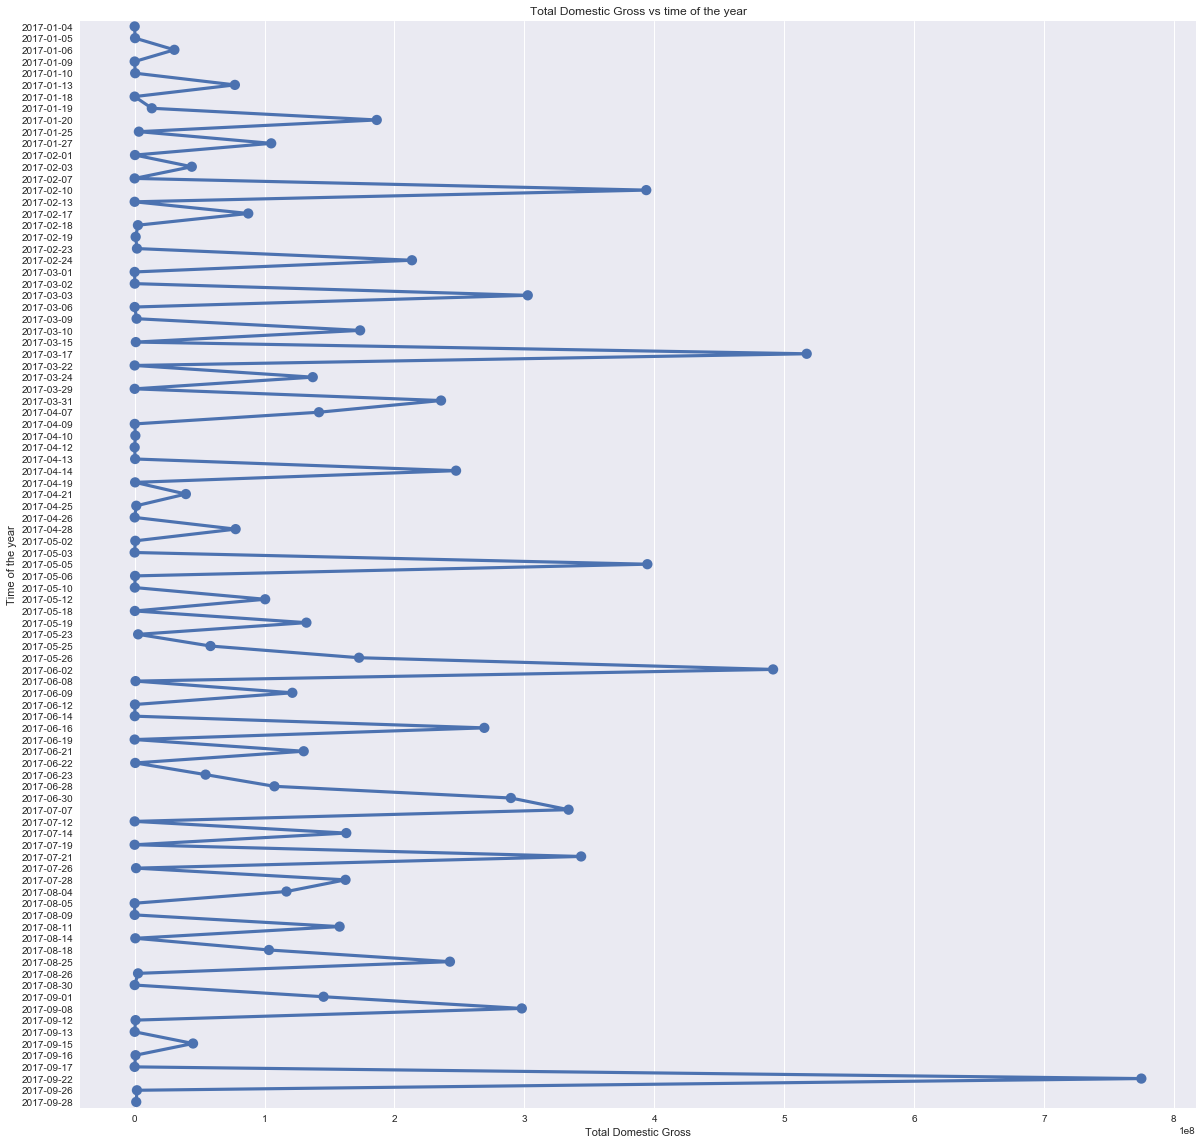

In [190]:
#movies_year.plot(x = 'Release Date', y = 'domestic_sales')
plt.rcParams["figure.figsize"] = [20,20]
sns.pointplot(x = 'domestic_sales', y = 'Release Date', data = movies_year_2017)
plt.title('Total Domestic Gross vs time of the year')
plt.ylabel("Time of the year" )
plt.xlabel("Total Domestic Gross")

**Challenge 2**

Plot runtime vs. domestic total gross.


In [192]:
movies_runtime = movies.groupby(['Runtime']) ['domestic_sales']. sum().reset_index()
movies_runtime = movies_runtime[movies_runtime['Runtime']>=60].reset_index() # I want to focus on movies whose runtime is atleast 60 minutes

In [193]:
movies_runtime

,index,Runtime,domestic_sales
0,5,60.000,452053.000
1,6,61.000,2502.000
2,7,65.000,4322.000
3,8,66.000,7052.000
4,9,67.000,7703.000
5,10,68.000,309766.000
6,11,69.000,5966.000
7,12,70.000,8060.000
8,13,71.000,8778.000
9,14,72.000,369231.000


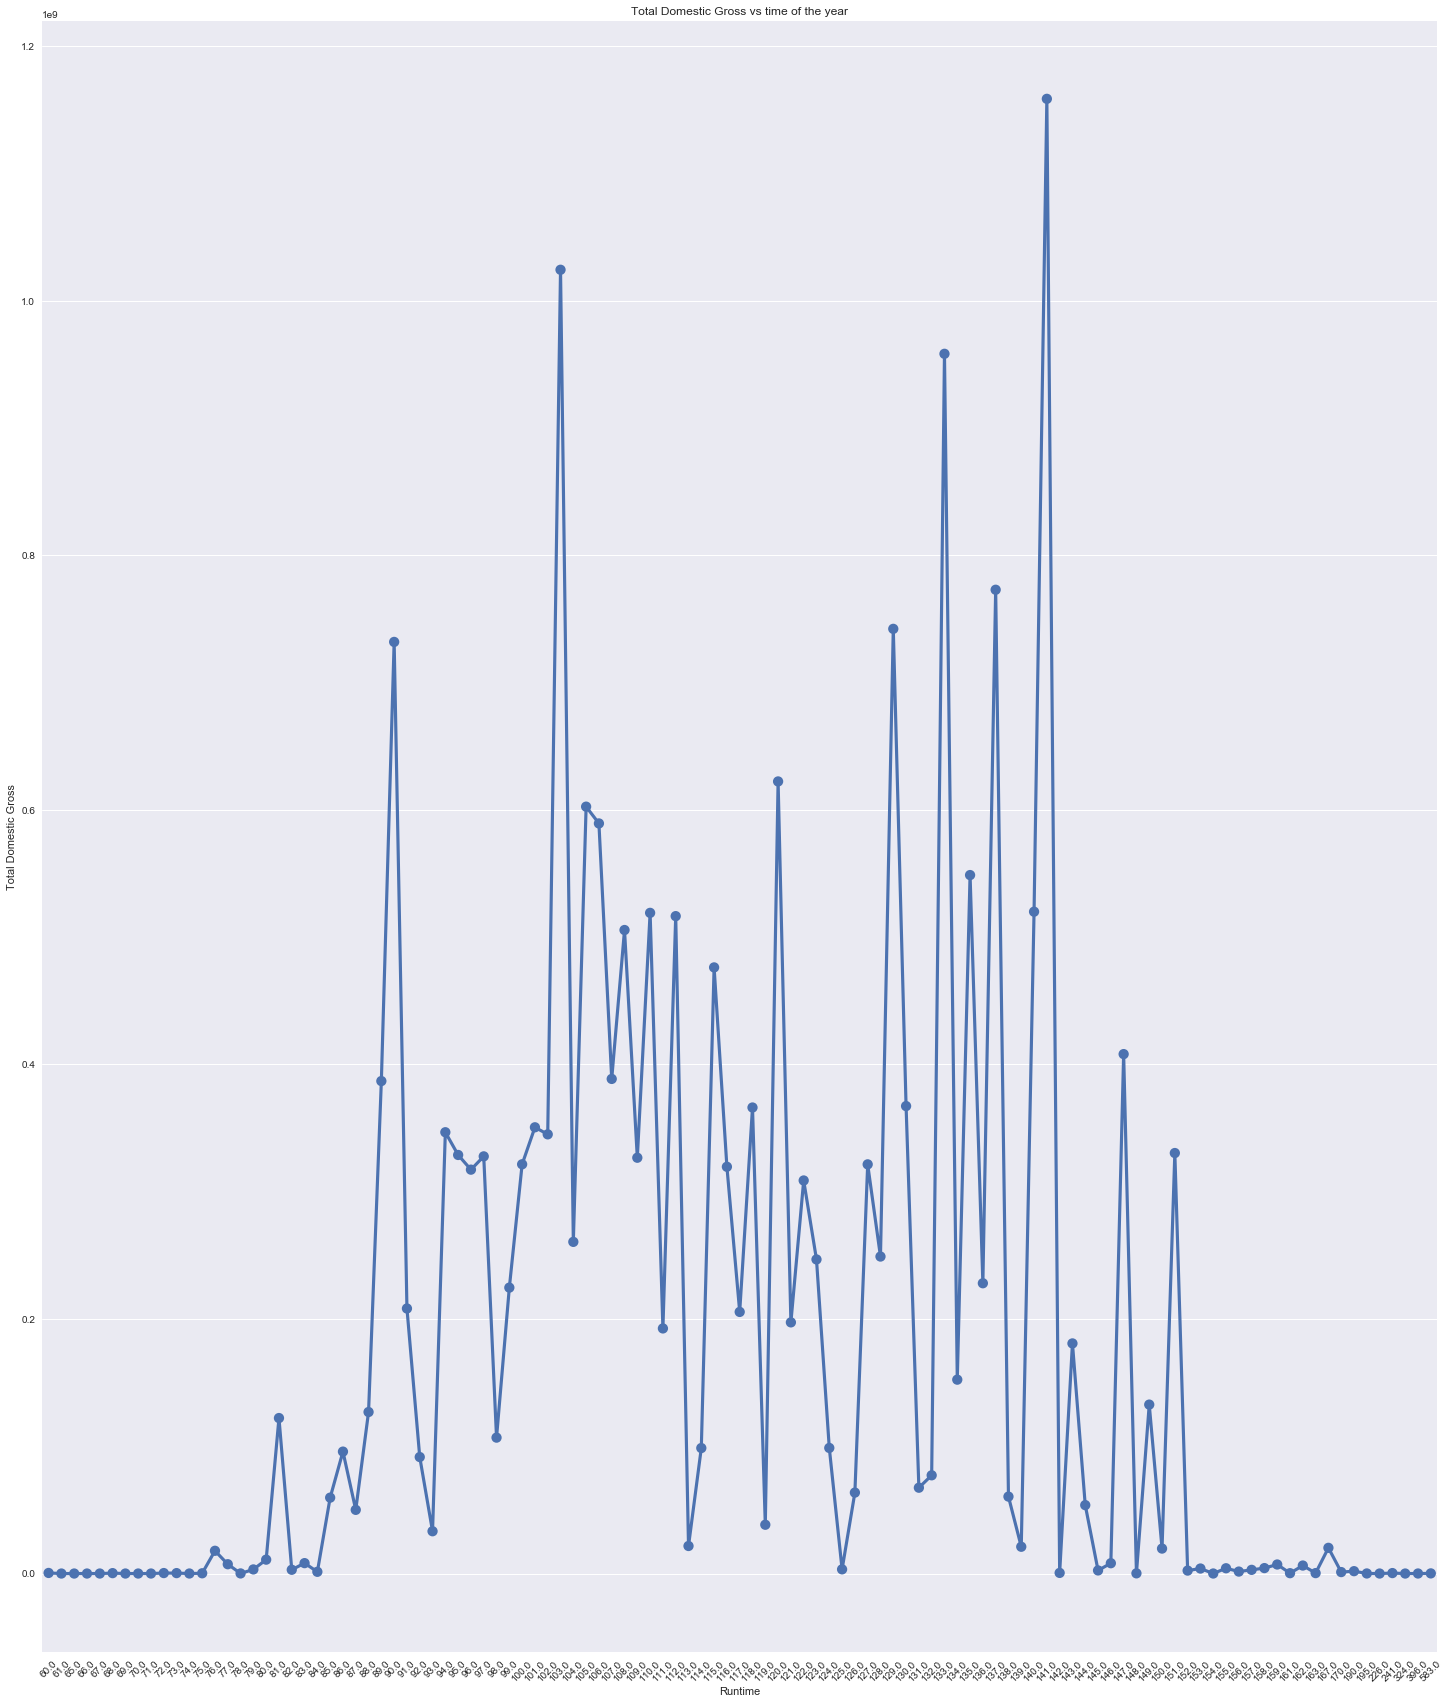

In [201]:
#movies_runtime.plot(x = 'Runtime', y = 'domestic_sales')
plt.rcParams["figure.figsize"] = [25,30]
ax = sns.pointplot(x = 'Runtime', y = 'domestic_sales', data = movies_runtime)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Total Domestic Gross vs time of the year')
plt.ylabel("Total Domestic Gross" )
plt.xlabel("Runtime")

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.



In [202]:
movies_measures = movies.groupby(['MPAA Rating']) ['domestic_sales']. mean().reset_index()

In [203]:
movies_measures

,MPAA Rating,domestic_sales
0,G,45988796.750
1,NC-17,3176.000
2,Not Yet Rated,768356.969
3,PG,58763052.129
4,PG-13,44916713.147
5,R,17222858.595
6,Unknown,1183907.100
7,Unrated,313791.389


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


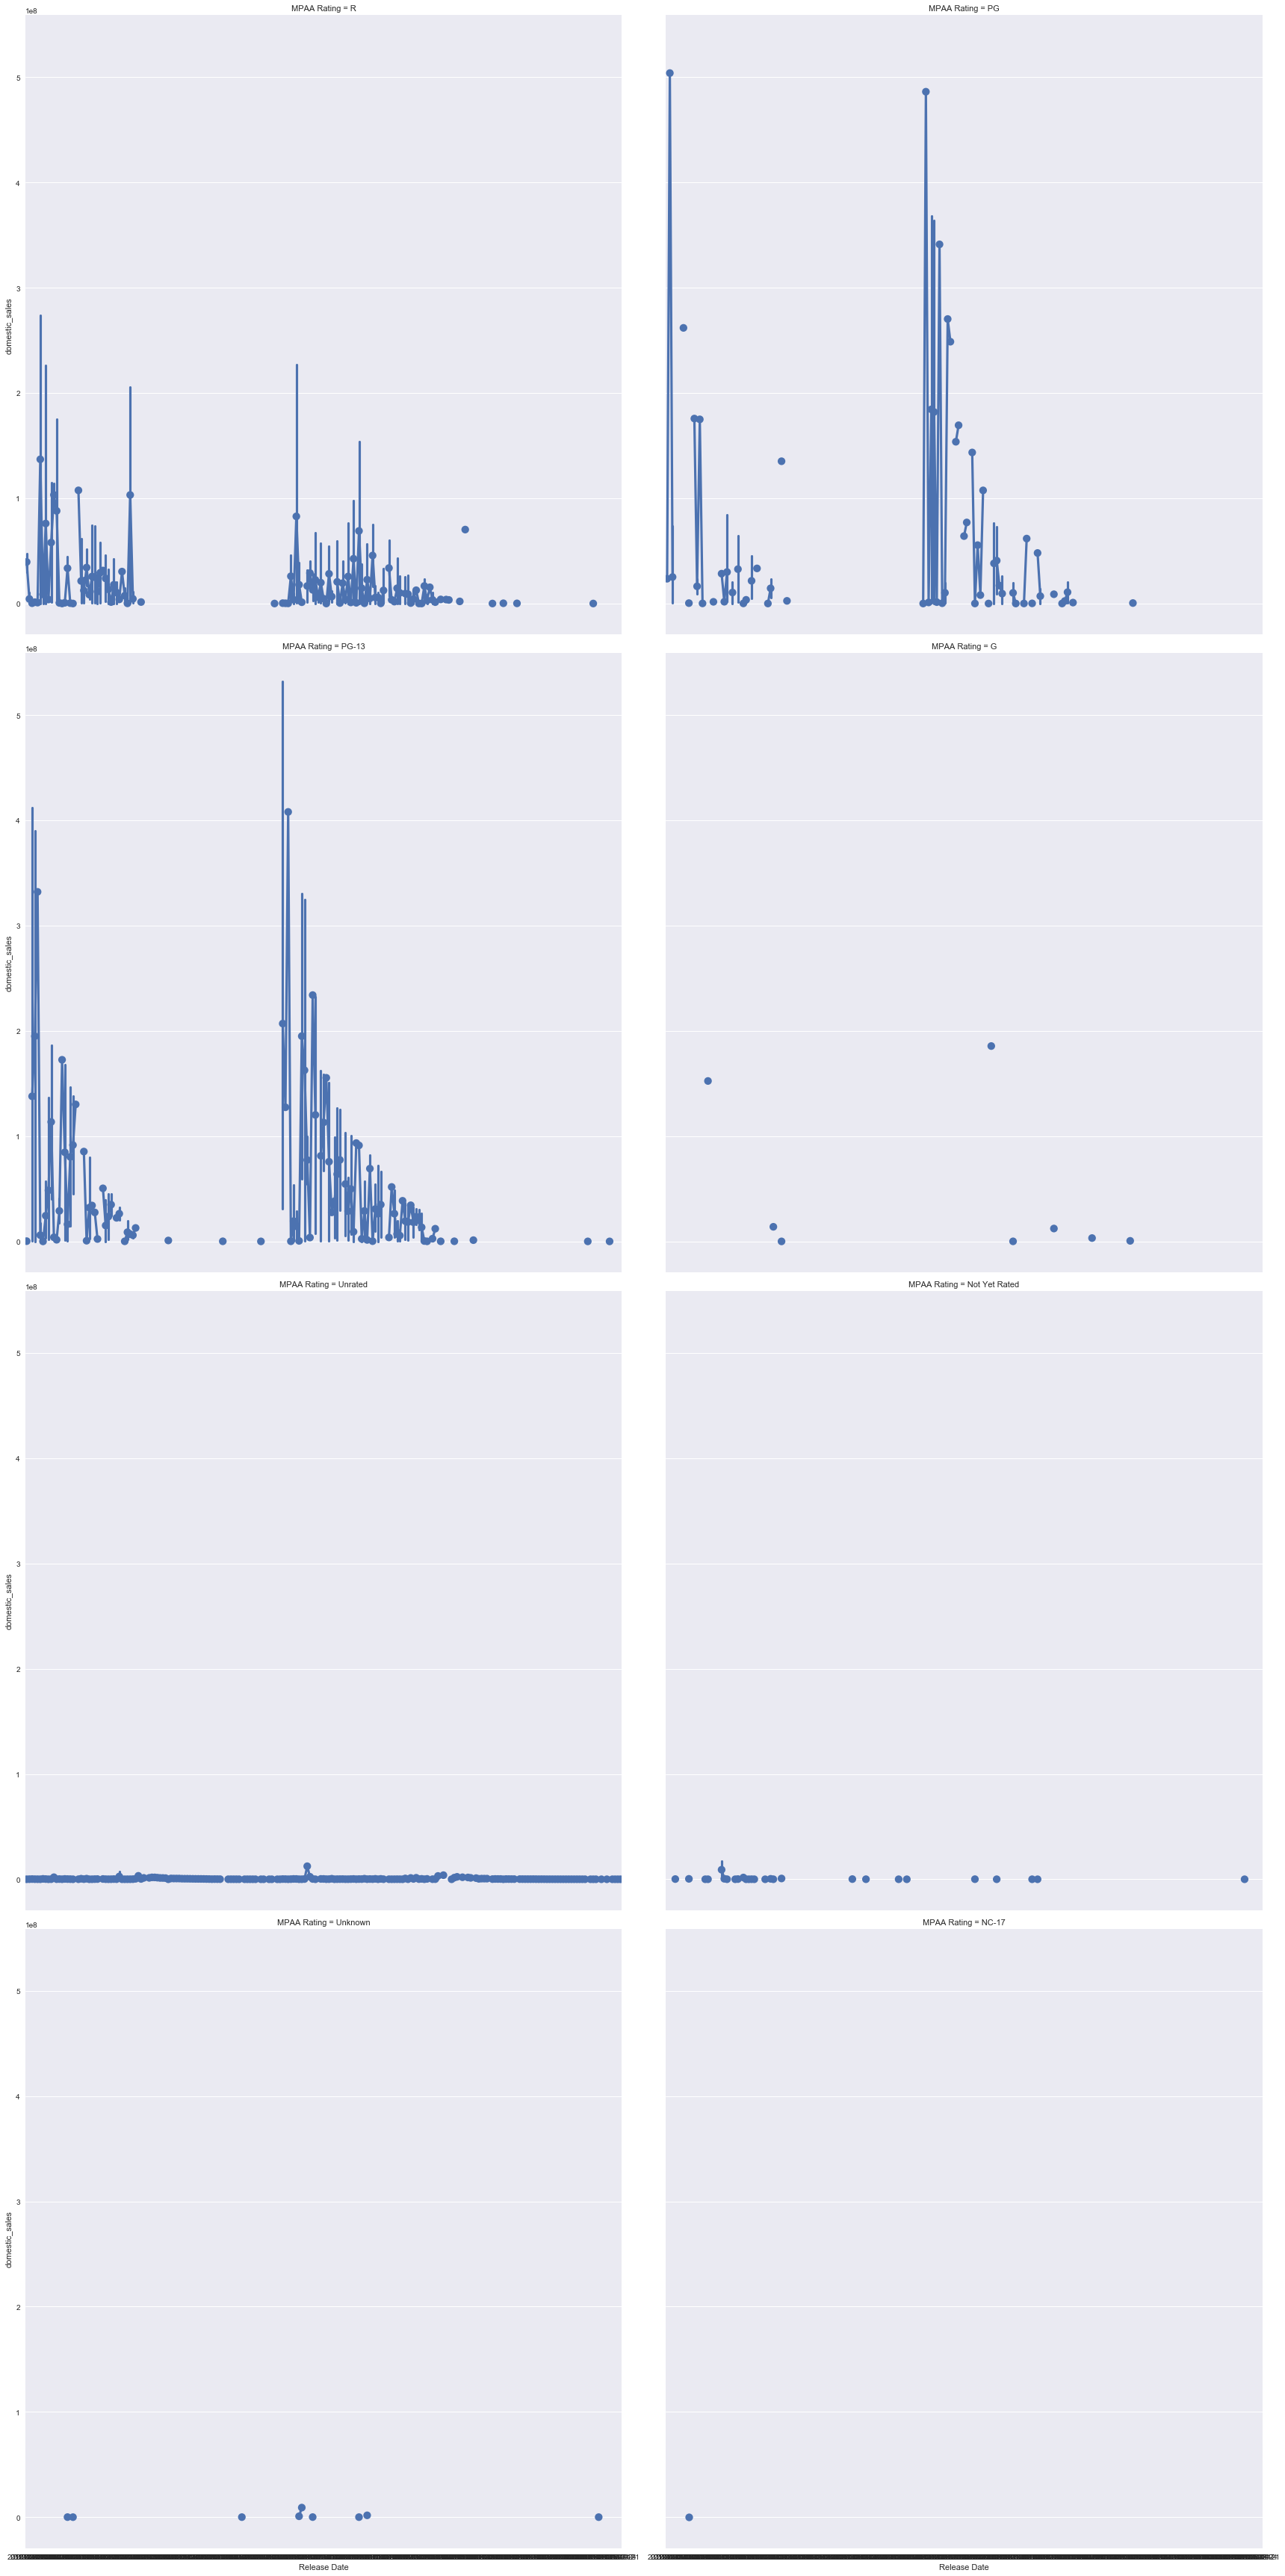

In [208]:
g = sns.factorplot(x="Release Date", y="domestic_sales",
                  col="MPAA Rating", data=movies, col_wrap= 2, size=12, aspect=1)

**Challenge 5**

What director in your dataset has the highest gross per movie?


In [74]:
mean_gross = movies.groupby(['Director']) ['domestic_sales']. mean().reset_index()

In [75]:
mean_gross

,Director,domestic_sales
0,A.R. Rahman,355922.000
1,Aaron Eckhart,5083906.000
2,Adam DeVine,46009673.000
3,Adam Wingard,20777061.000
4,Akiva Schaffer,9639125.000
5,Alec Baldwin,12522.000
6,Alejandro Amenabar,55039.000
7,Alex Kurtzman,80101125.000
8,Alex Proyas,31153464.000
9,Alfred Molina,702537.000


In [85]:
index = mean_gross['domestic_sales'].idxmax()
index

110

In [86]:
print("The top director is", mean_gross.get_value(index,'Director'))

The top director is Gareth Edwards


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."


In [92]:
gross_month = movies.groupby(['Release month']) ['domestic_sales'].mean().reset_index()

In [93]:
gross_month

,Release month,domestic_sales
0,1.000,11149857.400
1,2.000,16165775.506
2,3.000,18740754.083
3,4.000,9117447.729
4,5.000,17200927.538
5,6.000,20651833.547
6,7.000,22294934.179
7,8.000,11831667.944
8,9.000,11223369.320
9,10.000,7710288.516


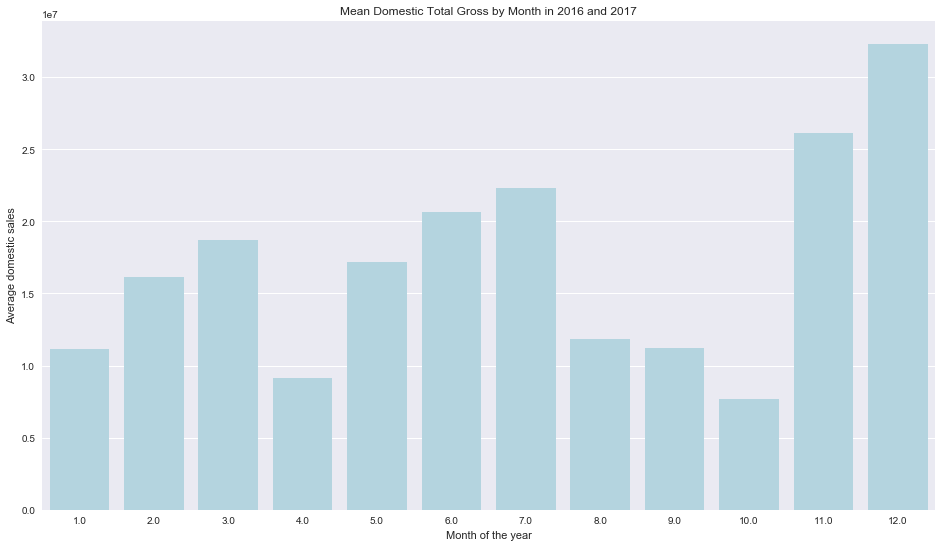

In [145]:
errors = movies.groupby(['Release month']) ['domestic_sales']. std().reset_index()
sns.barplot(x = 'Release month', y = 'domestic_sales', ci = 'sd', data = gross_month, color ='lightblue')

plt.xlabel('Month of the year')
plt.ylabel('Average domestic sales')
plt.title('Mean Domestic Total Gross by Month in 2016 and 2017')

In [131]:
gross_month_e = movies.groupby(['Release month']) ['domestic_sales'].std().reset_index()
gross_month_count = movies.groupby(['Release month']) ['domestic_sales'].count().reset_index()

In [132]:
gross_month_combined = gross_month_e.merge(gross_month_count , on='Release month', how='left')

In [134]:
gross_month_combined

,Release month,domestic_sales_x,domestic_sales_y
0,1.000,28897007.404,95
1,2.000,48855545.739,87
2,3.000,66520854.758,132
3,4.000,37551457.519,140
4,5.000,60727688.079,104
5,6.000,65737867.179,128
6,7.000,59349656.326,112
7,8.000,38581270.298,125
8,9.000,30418442.959,169
9,10.000,19025816.164,64


In [139]:
gross_month_combined['mean_stderror'] = gross_month_combined['domestic_sales_x'] / gross_month_combined['domestic_sales_y']**0.5

In [140]:
gross_month_combined

,Release month,domestic_sales_x,domestic_sales_y,mean_stderror
0,1.000,28897007.404,95,2964770.404
1,2.000,48855545.739,87,5237864.298
2,3.000,66520854.758,132,5789897.234
3,4.000,37551457.519,140,3173677.409
4,5.000,60727688.079,104,5954839.741
5,6.000,65737867.179,128,5810461.458
6,7.000,59349656.326,112,5608015.394
7,8.000,38581270.298,125,3450813.722
8,9.000,30418442.959,169,2339880.228
9,10.000,19025816.164,64,2378227.021


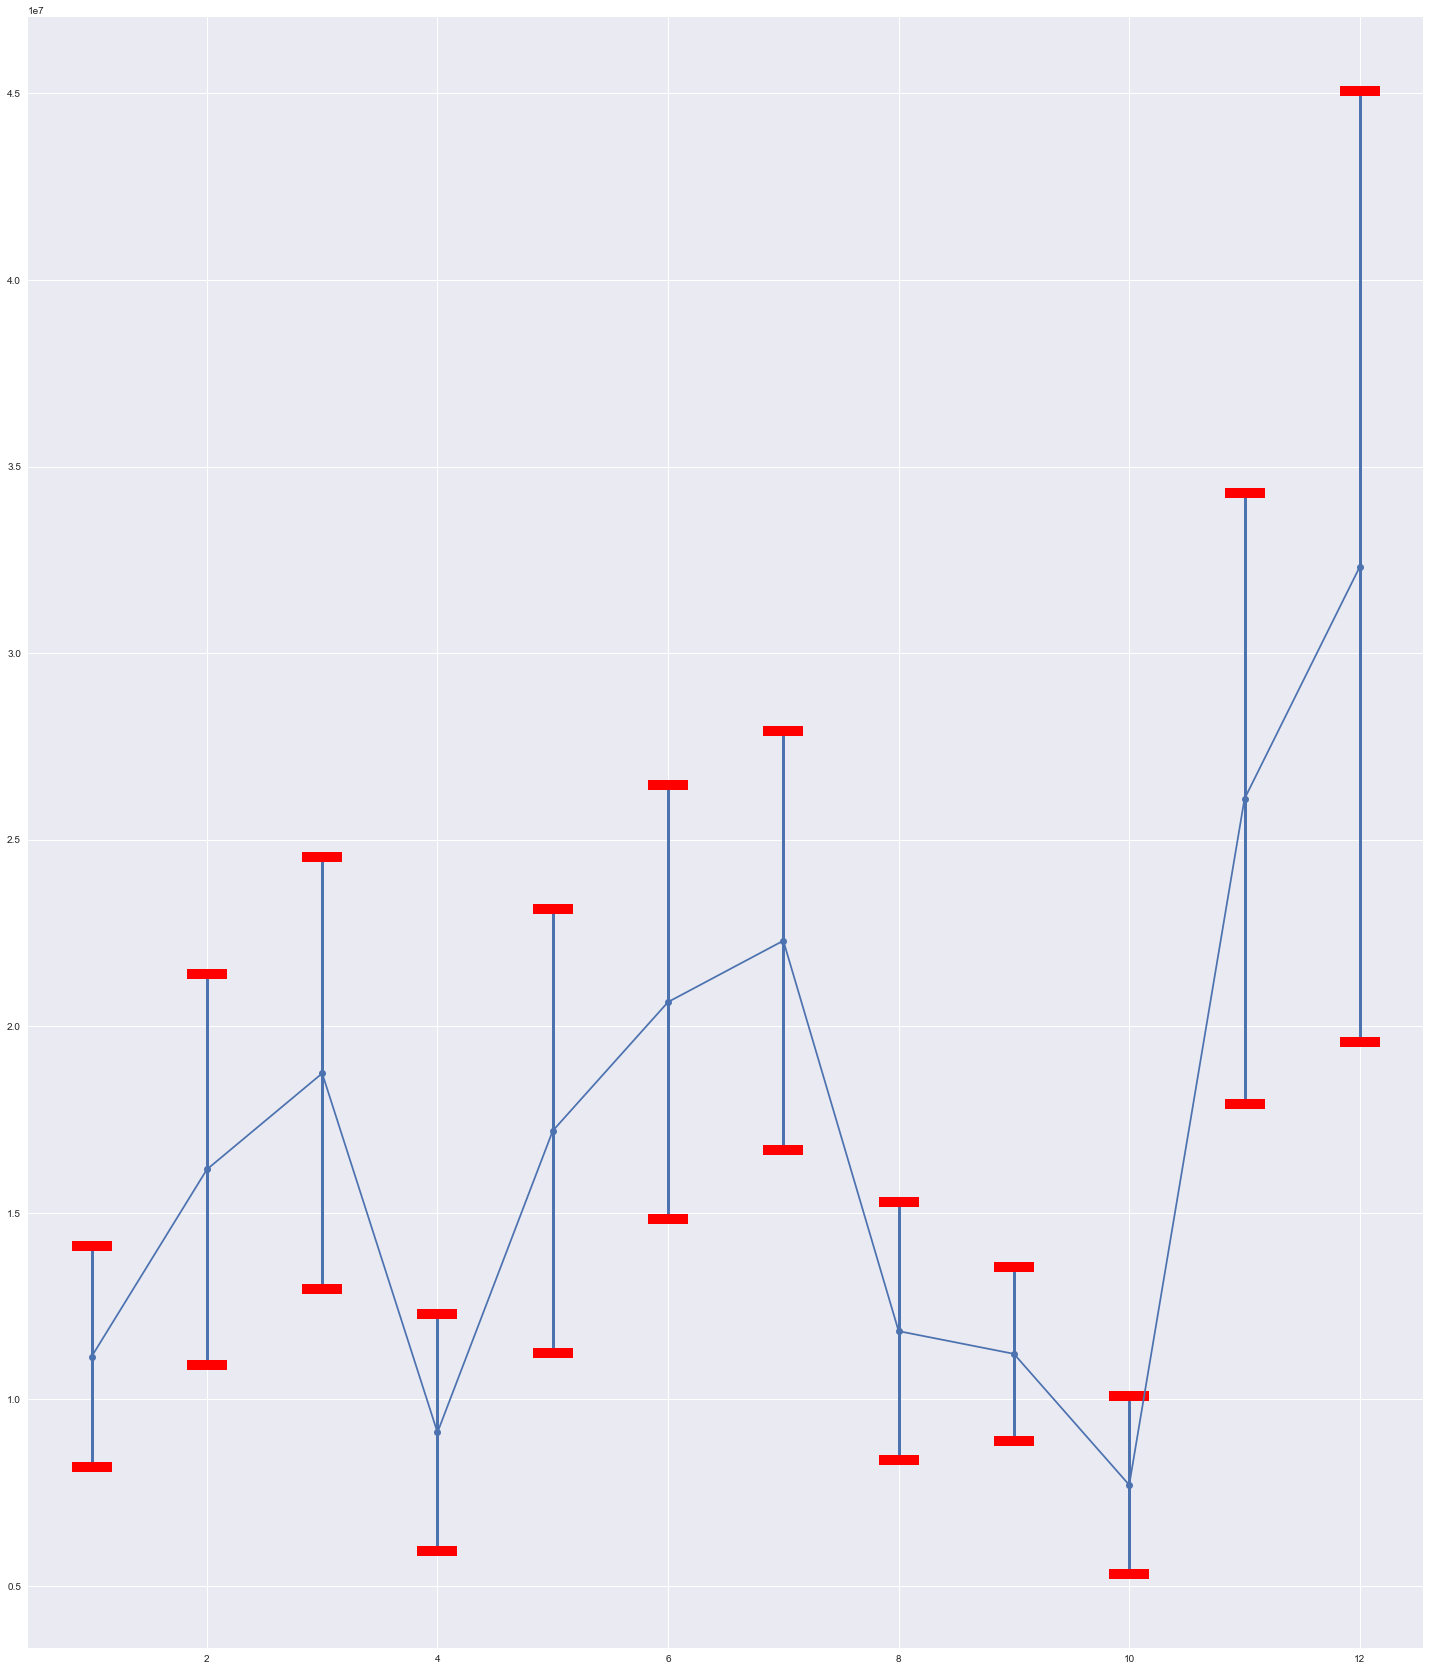

In [223]:
(_, caps, _) = plt.errorbar(gross_month['Release month'], gross_month['domestic_sales'] , yerr=gross_month_combined['mean_stderror'], marker='o',capsize=20, elinewidth=3)
for cap in caps:
    cap.set_color('red')
    cap.set_markeredgewidth(10)
